In [91]:
import torch as tc
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [92]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.deconv2 = nn.ConvTranspose2d(100, 512, 4, 1, 0)
        self.deconv2_bn = nn.BatchNorm2d(512)
        self.deconv3 = nn.ConvTranspose2d(512, 256, 4, 2, 1)
        self.deconv3_bn = nn.BatchNorm2d(256)
        self.deconv4 = nn.ConvTranspose2d(256, 128, 4, 2, 1)
        self.deconv4_bn = nn.BatchNorm2d(128)
        self.deconv5 = nn.ConvTranspose2d(128, 1, 4, 2, 1)
   
    def forward(self, input):
        x = F.relu(self.deconv2_bn(self.deconv2(input)))
        x = F.relu(self.deconv3_bn(self.deconv3(x)))
        x = F.relu(self.deconv4_bn(self.deconv4(x)))
        x = F.tanh(self.deconv5(x))
        return x

In [93]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(1, 128, 4, 2, 1)
        self.conv2 = nn.Conv2d(128, 256, 4, 2, 1)
        self.conv2_bn = nn.BatchNorm2d(256)
        self.conv3 = nn.Conv2d(256, 512, 4, 2, 1)
        self.conv3_bn = nn.BatchNorm2d(512)
        self.conv5 = nn.Conv2d(512, 1, 4, 1, 0)
    def forward(self, input):
        x = F.leaky_relu(self.conv1(input), 0.2)
        x = F.leaky_relu(self.conv2_bn(self.conv2(x)), 0.2)
        x = F.leaky_relu(self.conv3_bn(self.conv3(x)), 0.2)
        x = F.sigmoid(self.conv5(x))
        return x


In [94]:
z_dim = 100
G = Generator()
D = Discriminator()
D.load_state_dict(tc.load('D.pth',map_location = 'cpu'))
G.load_state_dict(tc.load('G.pth',map_location = 'cpu'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

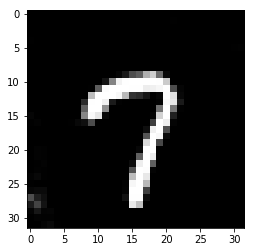

In [178]:
z = tc.randn(1, z_dim,1,1)
plt.imshow(G(z)[0,0].detach(),cmap = 'gray')
plt.savefig('a.png')